# Introduction to Mathematical Finance

## The time value of money

When you put money into a bank, it offer you an interest rate of $5\%$. 
So $100 becomes $105 in one year, and more interest will be added the year after.

| Year | 0 | 1 | 2 | 3 | 4 | 5 |
|------|---|---|---|---|---|---|
| Interest rate | 5% | 5% | 5% | 5% | 5% | 5% |
| Principal from last year | $100$ | $105$ | $110.25$ | $115.76$ | $121.55$ | $127.63$ |
| Interest from last to this year | $0$ | $5$ | $5.25$ | $5.51$ | $5.78$ | $6.07$ |
| Fund value| $100$ | $105$ | $110.25$ | $115.76$ | $121.55$ | $127.63$ |


<Axes: title={'center': 'Fund Value Over Time'}, xlabel='Year'>

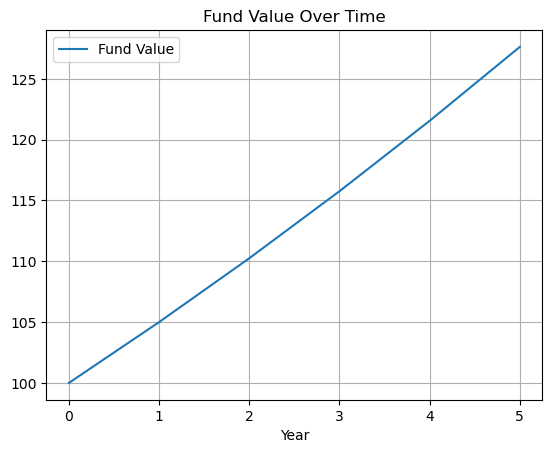

In [5]:
import pandas as pd

principal = 100
interestRate = 0.05
investmentTime = 5

fundValue = pd.Series(range(investmentTime + 1))

fundValue.name = 'Fund Value'
fundValue.index.name = 'Year'

fundValue[0] = principal

for i in range(investmentTime):
    fundValue[i + 1] = fundValue[i] * (1 + interestRate)

fundValue

fundValue.plot(title = 'Fund Value Over Time', grid = True, legend = True)

It may never naturally occur to one that money grows through time. 
How do we make sense of that?